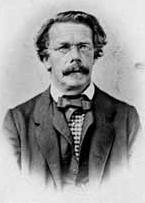
# Ludwig Otto Hesse

# 1. What the Hessian Matrix Is (Core Idea)

The **Hessian matrix** is a square matrix of **second-order partial derivatives** of a scalar-valued function

$$
f:\mathbb{R}^n \to \mathbb{R}.
$$

It captures how the **gradient changes** as you move in input/parameter space, i.e., the **local curvature** of the function.

Formally, for $$x = (x_1,\dots,x_n),$$ the Hessian is

$$
H_f(x) \;=\; \nabla^2 f(x)
\;=\;
\begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \cdots & \frac{\partial^2 f}{\partial x_1 \partial x_n} \\
\vdots & \ddots & \vdots \\
\frac{\partial^2 f}{\partial x_n \partial x_1} & \cdots & \frac{\partial^2 f}{\partial x_n^2}
\end{bmatrix}.
$$

If all second partial derivatives are continuous (i.e., $$f \in C^2$$), then **mixed partials commute**, and the Hessian is **symmetric**:

$$
\frac{\partial^2 f}{\partial x_i \partial x_j} \;=\; \frac{\partial^2 f}{\partial x_j \partial x_i}
\quad\Rightarrow\quad
H_f(x) = H_f(x)^\top.
$$

---

# 2. Geometric and Analytical Meaning

The Hessian describes the **second-order shape** of $$f$$ around a point:

- **Curvature**: how quickly the slope changes  
- **Bowl-like vs ridge-like** geometry  
- **Directional steepness**: curvature depends on direction  

For a unit direction $$v$$, the **directional (second) curvature** is

$$
v^\top H_f(x)\, v.
$$

If $$H_f(x)$$ is symmetric, it has an eigen-decomposition

$$
H_f(x) = Q \Lambda Q^\top,
$$

where:

- eigenvalues $$\lambda_i$$ are **principal curvatures**
- eigenvectors (columns of $$Q$$) are **principal directions** of curvature

---

# 3. Relation to Gradient and Jacobian

The gradient is a vector field:

$$
\nabla f(x) =
\begin{bmatrix}
\frac{\partial f}{\partial x_1}\\
\vdots\\
\frac{\partial f}{\partial x_n}
\end{bmatrix}.
$$

The Hessian is the **Jacobian of the gradient**:

$$
H_f(x) \;=\; J_{\nabla f}(x).
$$

Interpretation:

- Gradient: **first-order behavior** (local slope)
- Hessian: **second-order behavior** (local curvature)

---

# 4. Critical Points and the Second-Derivative Test

At a **critical point** $$x^\star$$ where

$$
\nabla f(x^\star) = 0,
$$

the Hessian determines the nature of the point:

- **Positive definite Hessian** $$H_f(x^\star) \succ 0$$  $$\Rightarrow$$ local minimum  
- **Negative definite Hessian** $$H_f(x^\star) \prec 0$$  $$\Rightarrow$$ local maximum  
- **Indefinite Hessian** (mixed-sign eigenvalues) $$\Rightarrow$$ saddle point  
- **Singular / semidefinite Hessian** $$\Rightarrow$$ inconclusive test  

This is foundational in optimization and stability analysis.

---

# 5. Taylor Expansion Interpretation (Key for AI)

The Hessian appears naturally in the **second-order Taylor expansion**:

$$
f(x+\Delta x)
\;\approx\;
f(x) + \nabla f(x)^\top \Delta x
+ \frac{1}{2}\Delta x^\top H_f(x)\Delta x.
$$

The term

$$
\frac{1}{2}\Delta x^\top H_f(x)\Delta x
$$

is the **quadratic correction** and directly encodes local curvature.  
It controls how accurate a local quadratic approximation is.

---

# 6. How the Hessian Works in AI Models

In machine learning, the function is typically a **loss**:

$$
L(\theta),
$$

where $$\theta \in \mathbb{R}^n$$ are model parameters. The Hessian

$$
H_L(\theta) = \nabla^2_\theta L(\theta)
$$

describes the **curvature of the loss landscape**.

---

## 6.1 Curvature of the Loss Landscape

The Hessian characterizes local shape:

- **Flat minima**: small curvature in many directions  
- **Sharp minima**: large curvature in some directions  
- Large positive eigenvalues $$\Rightarrow$$ steep directions  
- Small eigenvalues $$\Rightarrow$$ flat directions  

A standard scalar summary is the **condition number** (when SPD):

$$
\kappa(H) = \frac{\lambda_{\max}}{\lambda_{\min}}.
$$

Large $$\kappa(H)$$ indicates **ill-conditioning**, often linked to slow/unstable optimization.

---

## 6.2 Newton-Type Methods

Newton updates use curvature to rescale the gradient:

$$
\theta_{t+1} = \theta_t - H_L(\theta_t)^{-1}\nabla L(\theta_t).
$$

Advantages:
- fast local convergence near well-behaved minima

Disadvantages:
- Hessian storage is $$O(n^2)$$ and inversion is typically $$O(n^3)$$, infeasible for large deep nets

---

## 6.3 Quasi-Newton Methods (Practical AI)

Methods like **BFGS** and **L-BFGS** construct an approximation to $$H^{-1}$$ using gradient differences:

$$
s_t = \theta_{t+1}-\theta_t,\qquad
y_t = \nabla L(\theta_{t+1})-\nabla L(\theta_t).
$$

They avoid explicit Hessians and are widely used in classical ML / medium-scale settings.

---

## 6.4 Hessian–Vector Products (Deep Learning Trick)

Deep learning frameworks often avoid forming $$H$$ explicitly and compute

$$
H(\theta)\,v
$$

efficiently via automatic differentiation. This enables:

- truncated Newton methods  
- curvature-aware diagnostics  
- estimating top eigenvalues / spectral properties  

without storing the full matrix.

---

# 7. Stability, Conditioning, and Training Dynamics

The Hessian governs training stability through its spectrum:

- **Exploding gradients** often correlate with large curvature directions (large $$\lambda_{\max}$$)
- **Vanishing gradients** often correlate with near-flat directions (small eigenvalues)

Ill-conditioning appears when

$$
\kappa(H) \gg 1.
$$

This motivates stabilizers such as:
- gradient clipping
- learning-rate schedules
- adaptive optimizers
- curvature approximations / preconditioning

---

# 8. Generalization and Flatness

Empirically, solutions in regions where the Hessian is “small” in aggregate often generalize better, e.g.:

- small dominant eigenvalues  
- small trace (sum of eigenvalues)

$$
\mathrm{tr}(H) = \sum_{i=1}^n \lambda_i.
$$

These ideas connect the Hessian to **flat vs sharp minima** analyses and generalization behavior.

---

# 9. Constrained Optimization (Bordered Hessian)

With constraints (e.g., equality constraints), optimality conditions involve a **bordered Hessian** from the Lagrangian

$$
\mathcal{L}(\theta,\lambda) = L(\theta) + \lambda^\top c(\theta),
$$

where $$c(\theta)=0$$ encodes constraints. The bordered Hessian helps classify constrained extrema and appears in KKT-based analysis.

---

# 10. Beyond Scalar Losses

If outputs are vector-valued, second derivatives form higher-order objects (tensors). In most AI training, this is reduced to a scalar loss $$L(\theta)$$ before optimization, restoring the standard Hessian.

---

# 11. Other AI-Relevant Applications

Computer vision:
- blob / structure detection using determinant-based constructs (e.g., Hessian-based detectors)

Optimization diagnostics:
- curvature monitoring, sensitivity analysis, uncertainty-related approximations

Evolution strategies:
- covariance adaptation often aligns with inverse-curvature structure in quadratic regimes

---

# 12. One-Sentence Mental Model

The gradient tells you where to go; the Hessian tells you how the terrain bends while you move.

---

# 13. Why the Hessian Is Fundamental in AI

- defines curvature of the objective
- controls convergence speed and step stability
- explains instability via conditioning and spectrum
- underpins sharp vs flat minima discussions
- connects geometry, optimization, and generalization
